In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import xrt
from xrt import xrtQook

In [40]:
help(xrt)

Help on package xrt:

NAME
    xrt

DESCRIPTION
    Package xrt (XRayTracer) is a python software library for ray tracing and
    wave propagation in x-ray regime. It is primarily meant for modeling
    synchrotron sources, beamlines and beamline elements. Includes a GUI tool for
    creating scripts.
    
    +----------------+---------------+-----------+
    |     |Itot|     |   |vcmSi-P|   | |VortexB| |
    +----------------+---------------+-----------+
    
    .. |Itot| animation:: _images/Itot
       :alt: &ensp;Intensity of undulator radiation on a transverse flat screen.
           The long axis is energy. One can observe two harmonics crossing the
           central line: the former is odd and the latter is even.
    .. |vcmSi-P| animation:: _images/vcmSi-FootprintP
       :alt: &ensp;Absorbed power and power density on a mirror at varying pitch
             angle.
       :loc: upper-right-corner
    .. |VortexB| animation:: _images/Laguerre-Gauss-ani
       :alt: &ensp;Vortex

In [54]:
xrtQook.pyw

AttributeError: module 'xrt.xrtQook' has no attribute 'pyw'

In [47]:
help(xrtQook)

Help on package xrt.xrtQook in xrt:

NAME
    xrt.xrtQook

DESCRIPTION
    Using xrtQook for script generation
    -----------------------------------
    
    - Start xrtQook: type ``python xrtQook.pyw`` from xrt/xrtQook or, if you have
      installed xrt by running setup.py, type ``xrtQook.pyw`` from any location.
    - Rename beamLine to myTestBeamline by double clicking on it (you do not have
      to, only for demonstration).
    - Right-click on myTestBeamline and Add Source → BendingMagnet.
    
      .. imagezoom:: _images/qookTutor1.png
         :scale: 60 %
    
    - In its properties change eMin to 10000-1 and eMax to 10000+1. The middle of
      this range will be used to automatically align crystals (one crystal in this
      example). Blue color indicates non-default values. These will be necessarily
      included into the generated script. All the default-valued parameters do not
      propagate into the script.
    
      .. imagezoom:: _images/qookTutor2.png
       

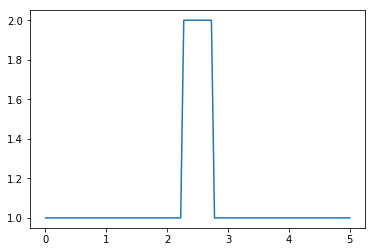

In [27]:
N = 100
x = np.linspace(0,5,N)
function = np.ones(N)
function[45:55] = 2



plt.plot(x,function)
plt.show()




In [ ]:
function = np.ones

In [ ]:
function = np.zeros

In [ ]:
kvalues = np.empty(N)

if N % 2 == 0:
    kvaluesoriginal = np.linspace(-N/2,(N/2)-1,N)/(sample_rate*N)
else:
    kvaluesoriginal = np.linspace(-(N-1)/2,(N-1)/2,N)/(sample_rate*N)
newN = int(N/2)
if N % 2 == 0:
    kvalues[0:newN] = kvaluesoriginal[newN:N]
    kvalues[newN:N] = kvaluesoriginal[0:newN]
if N % 2 != 0:
    kvalues[0:newN+1] = kvaluesoriginal[newN:N]
    kvalues[newN+1:N] = kvaluesoriginal[0:newN]

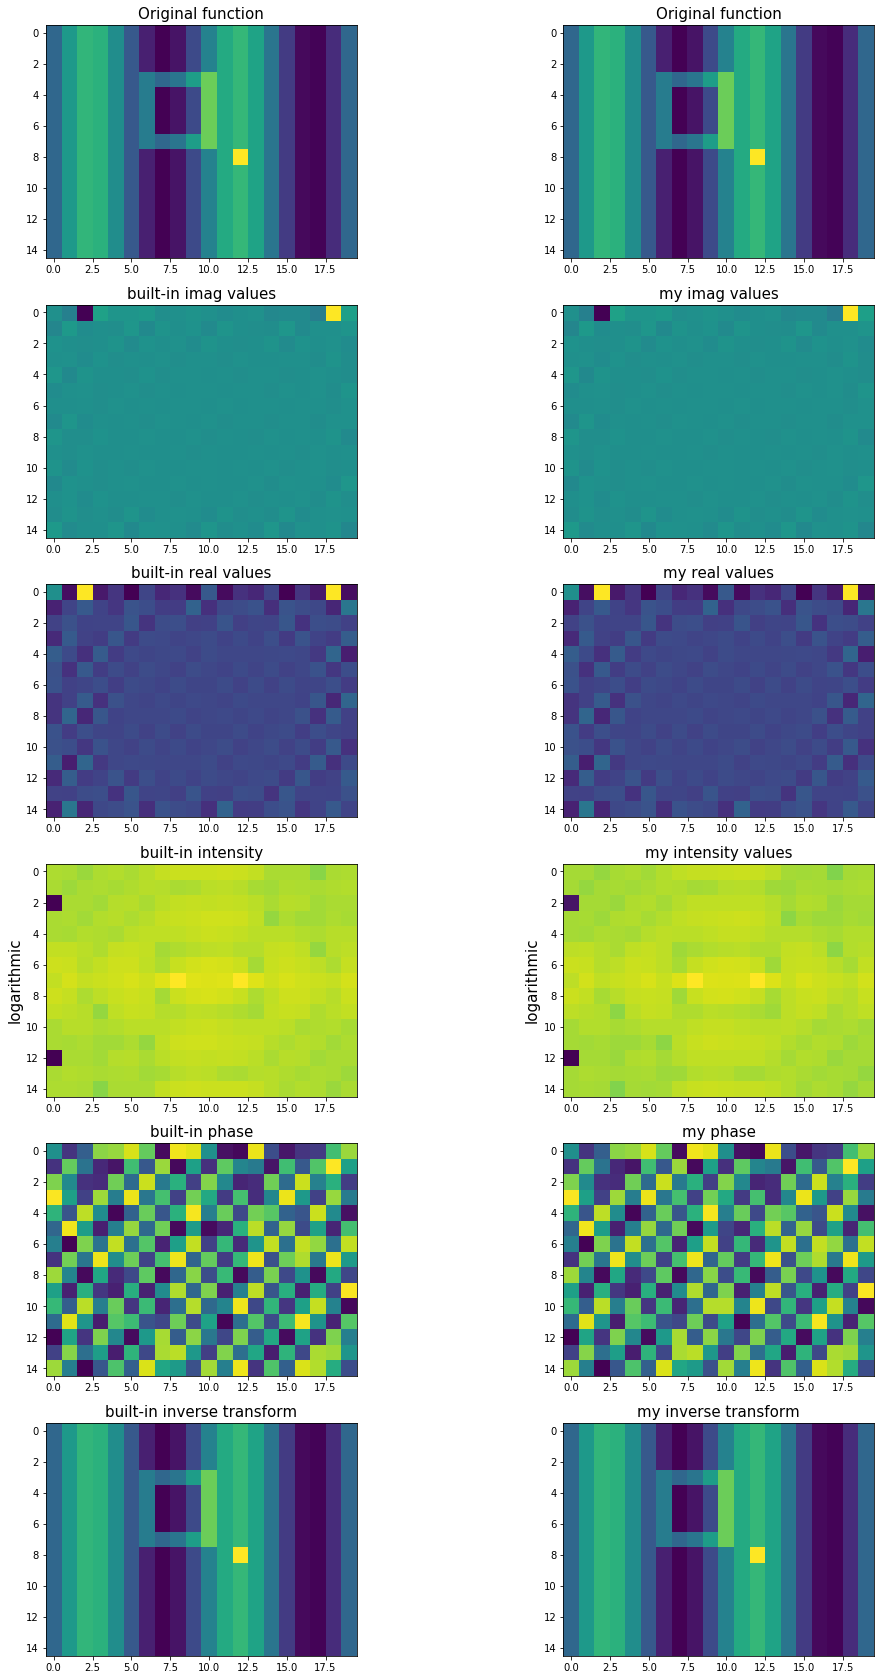

In [9]:
Z = np.zeros((15,20))
Z[3,6:11] = 1
Z[7,6:11] = 1
Z[4:7,6] = 1
Z[4:7,10] = 1
Z[6,10] = 1
Z[8,12] = 1

x = np.linspace(-np.pi,np.pi,np.size(Z, 1))
y = np.arange(-np.pi,np.pi,np.size(Z, 0))
X, Y = np.meshgrid(x,y)
Sine = np.sin(X*2 + Y*2)

function2 = Z + Sine
FFTf = np.fft.fft2(function2)
IFFTf = np.fft.ifft2(FFTf)

Nrow = np.size(function2, 0) # num rows
Ncol = np.size(function2, 1) # num columns
xr = np.arange(0,Nrow,1)
xc = np.arange(0,Ncol,1)
XC,XR = np.meshgrid(xc,xr)
transform = np.empty(np.shape(function2), dtype=np.complex)
forward_integrand = np.empty(np.shape(function2), dtype=np.complex)
inverse_transform = np.empty(np.shape(function2), dtype=np.complex)
backward_integrand = np.empty(np.shape(function2), dtype=np.complex)

for i in range(0,Nrow):
    for n in range(0,Ncol):
        forward_integrand = function2*np.exp(n*(-1j)*XC*2*np.pi/Ncol + i*(-1j)*XR*2*np.pi/Nrow)
        transform[i,n] = sum(sum(forward_integrand))        
for i in range(0,Nrow):
    for n in range(0,Ncol):
        backward_integrand = transform*np.exp(n*(1j)*XC*2*np.pi/Ncol + i*(1j)*XR*2*np.pi/Nrow)
        inverse_transform[i,n] = sum(sum(backward_integrand))
       
    
    
    
    
    
plt.subplots(figsize=(17,30))
plt.subplot(6,2,1)
plt.title('Original function', fontsize=15)
plt.imshow(function2)

plt.subplot(6,2,3)
plt.title('built-in imag values', fontsize=15)
plt.imshow(FFTf.imag)

plt.subplot(6,2,5)
plt.title('built-in real values', fontsize=15)
plt.imshow(FFTf.real)

plt.subplot(6,2,7)
plt.title('built-in intensity', fontsize=15)
plt.ylabel('logarithmic', fontsize=15)
plt.imshow(np.log(np.abs(np.fft.fftshift(FFTf))**2))

plt.subplot(6,2,9)
plt.title('built-in phase', fontsize=15)
plt.imshow(np.angle(FFTf))

plt.subplot(6,2,11)
plt.title('built-in inverse transform', fontsize=15)
plt.imshow(IFFTf.real)



plt.subplot(6,2,2)
plt.title('Original function', fontsize=15)
plt.imshow(function2)

plt.subplot(6,2,4)
plt.title('my imag values', fontsize=15)
plt.imshow(transform.imag)

plt.subplot(6,2,6)
plt.title('my real values', fontsize=15)
plt.imshow(transform.real)

plt.subplot(6,2,8)
plt.title('my intensity values', fontsize=15)
plt.ylabel('logarithmic', fontsize=15)
plt.imshow(np.log(np.abs(np.fft.fftshift(transform))**2))

plt.subplot(6,2,10)
plt.title('my phase', fontsize=15)
plt.imshow(np.angle(transform))

plt.subplot(6,2,12)
plt.title('my inverse transform', fontsize=15)
plt.imshow(inverse_transform.real)
plt.show()